In [ ]:
import numpy as np
import pandas as pd
from PIL import Image as pim

In [ ]:
def image_to_np(image):
  input_image = pim.open(image)
  return np.array(input_image)

In [ ]:
def two_step_interpolate(image, distension, contraction):
  image_1 = KNN(image, distension)
  return KNN(image_1, contraction)

In [ ]:
def KNN(image, coef):
  width = image.shape[1]
  height = image.shape[0]
  new_width = round(width * coef)
  new_height = round(height * coef)

  new_image = np.zeros(shape=(int(new_height), int(new_width), image.shape[2]))

  for x in range(new_width):
      for y in range(new_height):
        src_x = min(int(round(float(x) / float(new_width) * float(width))), width - 1)
        src_y = min(int(round(float(y) / float(new_height) * float(height))), height - 1)
        new_image[y, x] = image[src_y, src_x]

  return new_image

In [ ]:
input_array = image_to_np('1.bmp')

M, N = 1, 3

coef_1 = M*N
coef_2 = M/N

#int
output_array = KNN(input_array, coef_1)
output_int = pim.fromarray(output_array.astype('uint8'), 'RGB')
output_int.save('int_image.png')
output_int.show()

#dec
output_array = KNN(input_array, coef_2)
output_dec = pim.fromarray(output_array.astype('uint8'), 'RGB')
output_dec.save('dec_image.png')
output_dec.show()

#two_step
output_array = two_step_interpolate(input_array, coef_1, coef_2)
output_two_step = pim.fromarray(output_array.astype(np.uint8), 'RGB')
output_two_step.save('two_step_image.png')
output_two_step.show()

#one_step
output_array = KNN(input_array, coef_1)
output_one_step = pim.fromarray(output_array.astype(np.uint8), 'RGB')
output_one_step.save('one_step_image.png')
output_one_step.show()

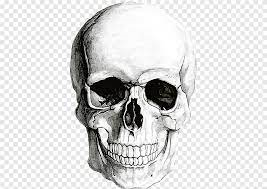

In [ ]:
input_image = pim.fromarray(input_array.astype(np.uint8), 'RGB')
input_image

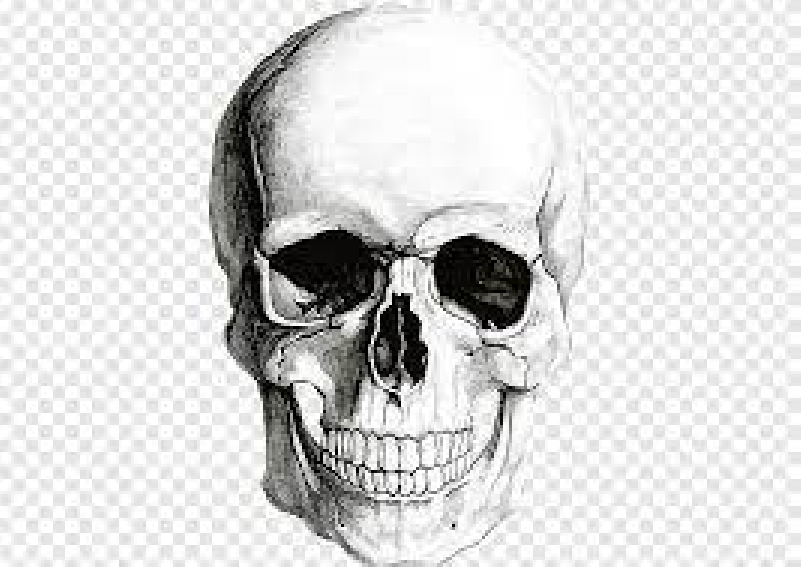

In [ ]:
output_int

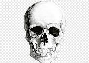

In [ ]:
output_dec

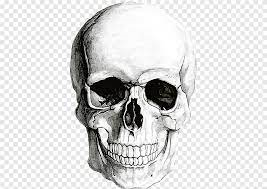

In [ ]:
output_two_step

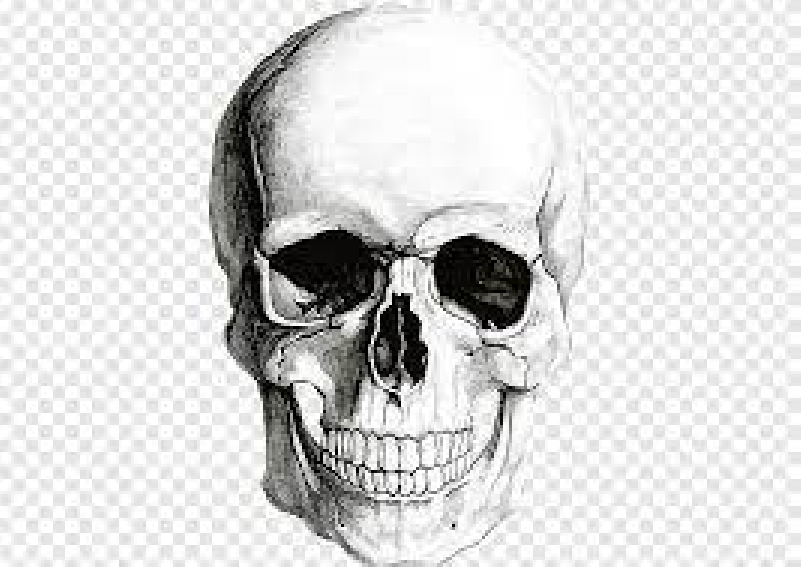

In [ ]:
output_one_step